In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action="ignore")

In [3]:
data = pd.read_csv("/Users/admin/Documents/Y3S1/CMPS 6790/Project/CT_2013_2022/CT_2013_2022.csv")
data.head()

,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,...,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
0,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
1,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
2,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
3,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
4,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Commercial/Office Building,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25


In [6]:
fraud_data = data[data["offense_name"].isin(["Credit Card/Automated Teller Machine Fraud", 
                                              "Wire Fraud", 
                                              "Welfare Fraud"])]
fraud_data.head()


,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,...,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
349,2012,SC0200000,Fairfield,NaN,County,SC,South Carolina,South Atlantic,FAIRFIELD,South,...,Convenience Store,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN
352,2012,SC0200000,Fairfield,NaN,County,SC,South Carolina,South Atlantic,FAIRFIELD,South,...,Residence/Home,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN
354,2012,SC0220200,Georgetown,NaN,City,SC,South Carolina,South Atlantic,GEORGETOWN,South,...,Shopping Mall,NaN,NaN,71.0,71.0,"Metals, Non-Precious",500.0,0,False,NaN
433,2012,TN0320100,Morristown,NaN,City,TN,Tennessee,East South Central,"HAMBLEN, JEFFERSON",South,...,Department/Discount Store,NaN,NaN,19.0,19.0,Merchandise,1066.0,0,False,NaN
512,2014,MI8121800,Ann Arbor,NaN,City,MI,Michigan,East North Central,WASHTENAW,Midwest,...,Service/Gas Station,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN


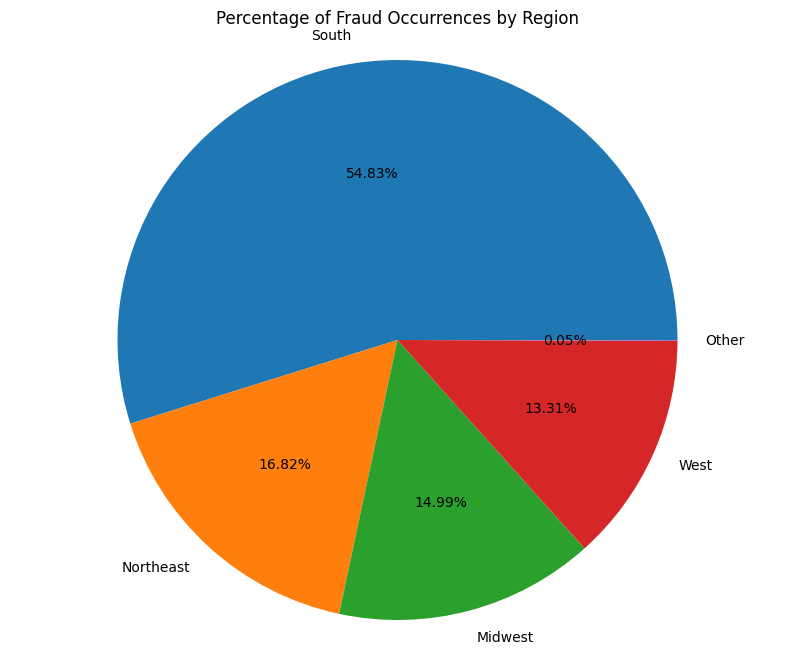

In [11]:
# count the occurrences of fraud by place
fraud_by_region = fraud_data['region_name'].value_counts()

# define a threshold for grouping smaller slices
threshold = 0.05
total_frauds = fraud_by_region.sum()
fraud_by_region = fraud_by_region[fraud_by_region / total_frauds > threshold]

# add an 'Other' category for the remaining slices
other_frauds = total_frauds - fraud_by_region.sum()
fraud_by_region['Other'] = other_frauds

# plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(fraud_by_region, labels=fraud_by_region.index, autopct='%1.2f%%')
plt.title('Percentage of Fraud Occurrences by Region')
plt.axis('equal')
plt.show()


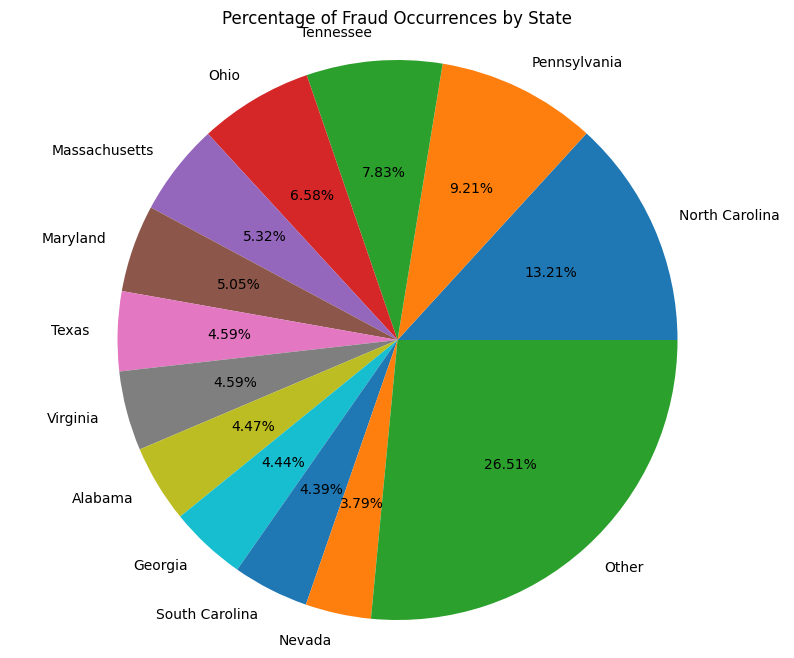

In [19]:
# count the occurrences of fraud by place
fraud_by_state = fraud_data['state_name'].value_counts()

# define a threshold for grouping smaller slices
threshold = 0.03
total_frauds = fraud_by_state.sum()
fraud_by_state = fraud_by_state[fraud_by_state / total_frauds > threshold]

# add an 'Other' category for the remaining slices
other_frauds = total_frauds - fraud_by_state.sum()
fraud_by_state['Other'] = other_frauds

# plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(fraud_by_state, labels=fraud_by_state.index, autopct='%1.2f%%')
plt.title('Percentage of Fraud Occurrences by State')
plt.axis('equal')
plt.show()


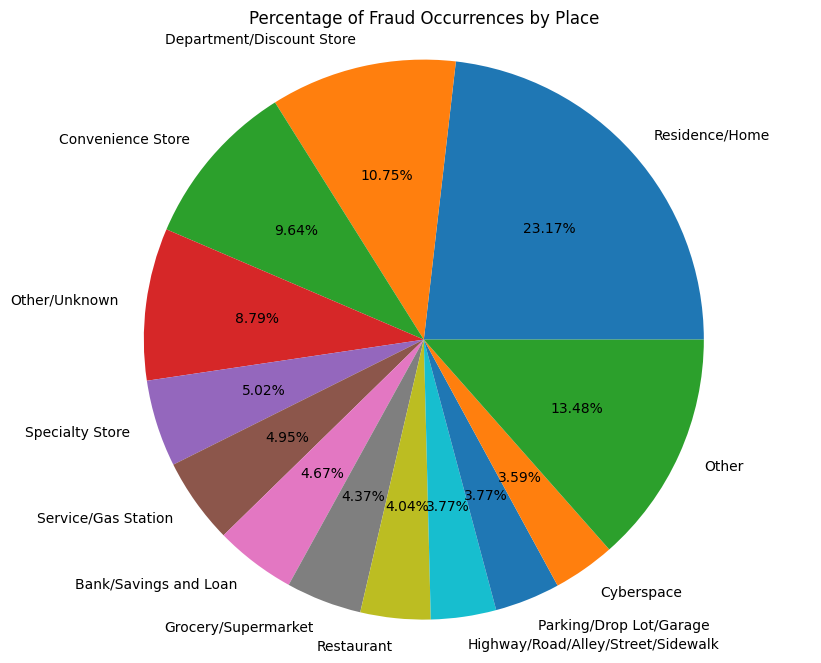

In [20]:
# count the occurrences of fraud by place
fraud_by_place = fraud_data['location_name'].value_counts()

# define a threshold for grouping smaller slices
threshold = 0.03
total_frauds = fraud_by_place.sum()
fraud_by_place = fraud_by_place[fraud_by_place / total_frauds > threshold]

# add an 'Other' category for the remaining slices
other_frauds = total_frauds - fraud_by_place.sum()
fraud_by_place['Other'] = other_frauds

# plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(fraud_by_place, labels=fraud_by_place.index, autopct='%1.2f%%')
plt.title('Percentage of Fraud Occurrences by Place')
plt.axis('equal')
plt.show()


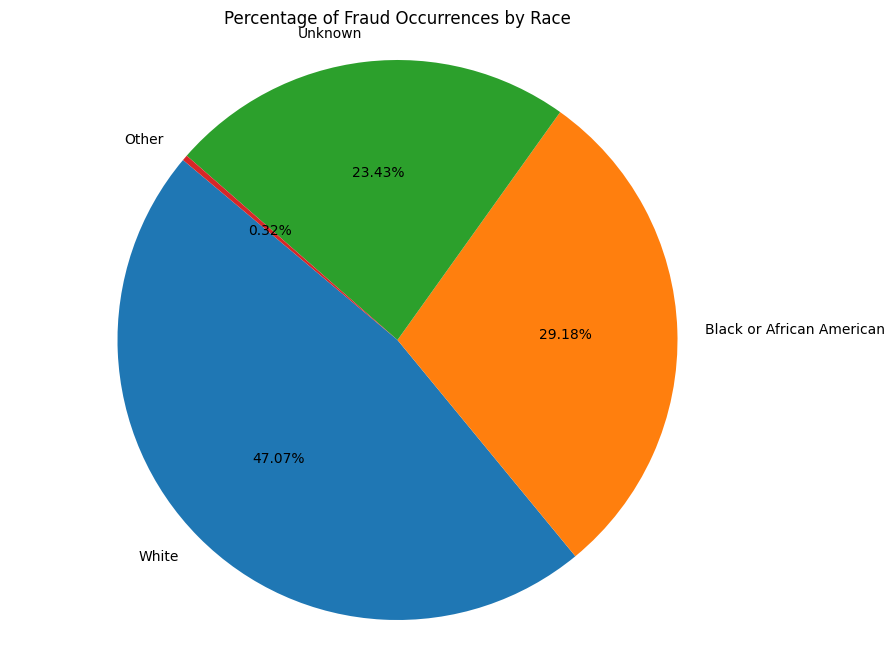

In [16]:
# count the occurrences of fraud by place
fraud_by_race = fraud_data['offender_race'].value_counts()

# define a threshold for grouping smaller slices
threshold = 0.02
total_frauds = fraud_by_race.sum()
fraud_by_race = fraud_by_race[fraud_by_race / total_frauds > threshold]

# add an 'Other' category for the remaining slices
other_frauds = total_frauds - fraud_by_race.sum()
fraud_by_race['Other'] = other_frauds

# plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(fraud_by_race, labels=fraud_by_race.index, autopct='%1.2f%%', startangle=140)
plt.title('Percentage of Fraud Occurrences by Race')
plt.axis('equal')
plt.show()


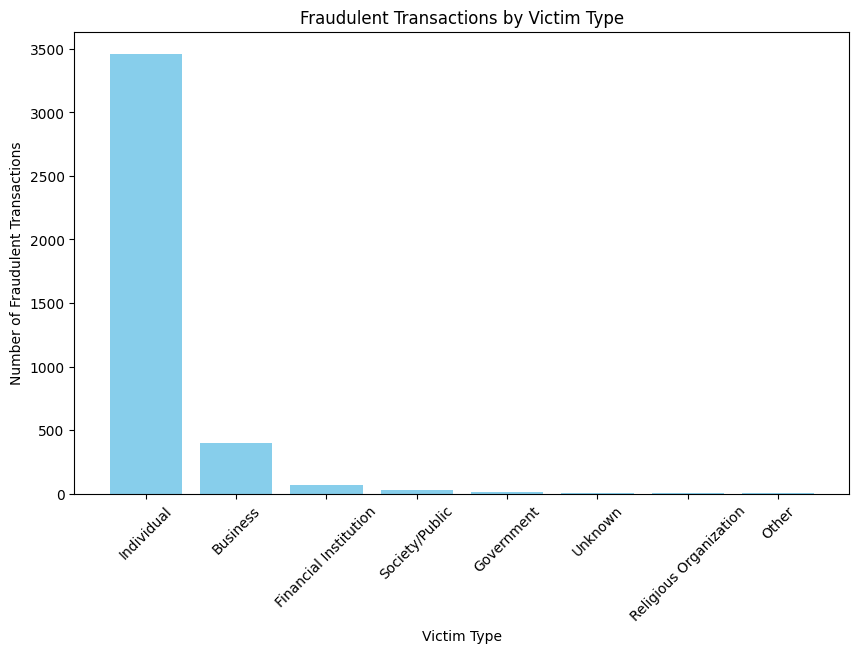

In [14]:
# count the occurrences of fraud by account type
fraud_by_type = fraud_data['victim_type_name'].value_counts()

# plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(fraud_by_type.index, fraud_by_type.values, color='skyblue')
plt.xlabel('Victim Type')
plt.xticks(rotation=45)
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Victim Type')
plt.show()

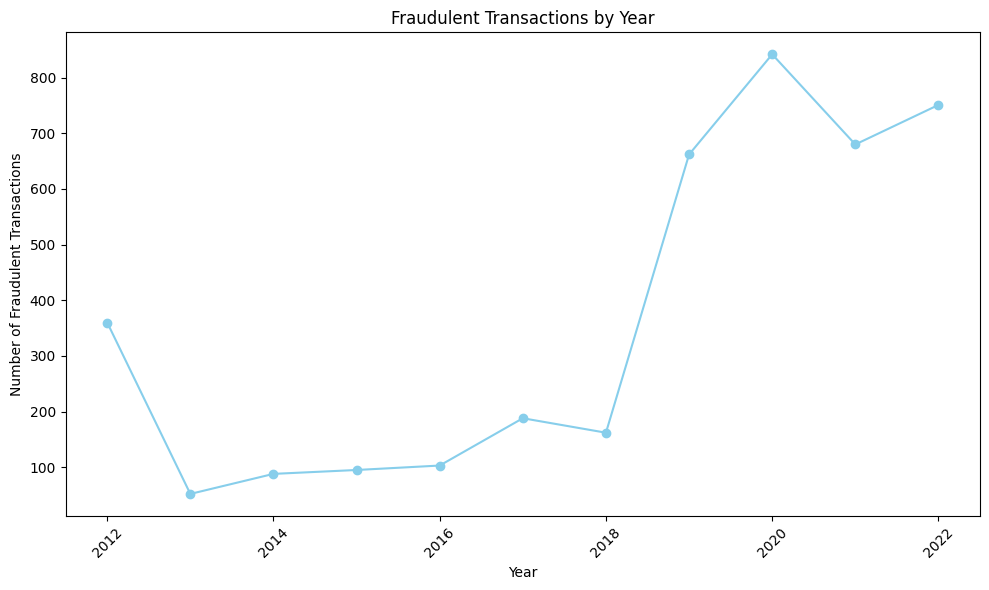

In [15]:
# count the occurrences of fraud by year
fraud_by_year = fraud_data['data_year'].value_counts().sort_index()

# plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(fraud_by_year.index, fraud_by_year.values, color='skyblue', marker='o')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Year')
plt.tight_layout() 
plt.show()
plt.show()